# Preprocessing: K562 data (Replogle 2022)
- download `K562_essential_raw_singlecell_01.h5ad` from [https://plus.figshare.com/articles/dataset/_Mapping_information-rich_genotype-phenotype_landscapes_with_genome-scale_Perturb-seq_Replogle_et_al_2022_processed_Perturb-seq_datasets/20029387](https://plus.figshare.com/articles/dataset/_Mapping_information-rich_genotype-phenotype_landscapes_with_genome-scale_Perturb-seq_Replogle_et_al_2022_processed_Perturb-seq_datasets/20029387) and save it to `/WhyDOE_RWD_Analysis/`

In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import SEACells

from tools.preferences import level_cmap, seurat
from tools.bioinfo import gene_query, GeneCacheManager, get_xor
import tools.bioinfo.scanpy_extensions as sce

In [2]:
data = sc.read_h5ad("./K562_essential_raw_singlecell_01.h5ad")

In [3]:
data.X

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 4., ..., 0., 0., 0.],
       [0., 1., 5., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
data.obs.columns

Index(['gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript',
       'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI',
       'core_scale_factor', 'core_adjusted_UMI_count'],
      dtype='object')

In [5]:
data.obs["gene"].value_counts()

gene
non-targeting    10691
RPL3              1996
NCBP2              992
KIF11              974
SLC39A9            752
                 ...  
PPP1R10              7
POLR3A               6
POT1                 5
RBM22                5
SEC62                5
Name: count, Length: 2058, dtype: int64

In [6]:
data.obs["sgID_AB"].value_counts()

sgID_AB
RPL3_+_39715369.23-P1P2|RPL3_+_39715378.23-P1P2          1996
NCBP2_-_196669400.23-P1P2|NCBP2_-_196669410.23-P1P2       992
KIF11_-_94352958.23-P1P2|KIF11_-_94352939.23-P1P2         974
SLC39A9_+_69865454.23-P1P2|SLC39A9_-_69865448.23-P1P2     752
DONSON_+_34960976.23-P1P2|DONSON_+_34960973.23-P1P2       745
                                                         ... 
EIF4A3_+_78120928.23-P1P2|EIF4A3_+_78120934.23-P1P2         7
POLR3A_-_79789274.23-P1P2|POLR3A_+_79789257.23-P1P2         6
RBM22_-_150080586.23-P1P2|RBM22_-_150080593.23-P1P2         5
POT1_+_124569865.23-P1P2|POT1_-_124569870.23-P1P2           5
SEC62_-_169684596.23-P1P2|SEC62_-_169684666.23-P1P2         5
Name: count, Length: 2273, dtype: int64

In [7]:
df = data[data.obs["gene"] == "non-targeting", :]

In [8]:
del data

In [9]:
df.shape

(10691, 8563)

In [10]:
df.X.sum(axis=1).min()

2375.0

In [11]:
df.X.max()

array(1475., dtype=float32)

In [12]:
df.var

gene_name         chr   start      end           class  \
gene_id                                                                    
ENSG00000237491   LINC01409        chr1  778747   810065  gene_version10   
ENSG00000228794   LINC01128        chr1  825138   868202   gene_version9   
ENSG00000188976       NOC2L        chr1  944203   959309  gene_version11   
ENSG00000187961      KLHL17        chr1  960584   965719  gene_version14   
ENSG00000188290        HES4        chr1  998962  1000172  gene_version10   
...                     ...         ...     ...      ...             ...   
ENSG00000278704  BX004987.1  GL000009.2   56140    58376   gene_version1   
ENSG00000274847       MAFIP  GL000194.1   53594   115055   gene_version1   
ENSG00000278384  AL354822.1  GL000218.1   51867    54893   gene_version1   
ENSG00000271254  AC240274.1  KI270711.1    4612    29626   gene_version6   
ENSG00000276345  AC004556.3  KI270721.1    2585    11802   gene_version1   

                strand  length  in_matrix      mean       std        cv  \
gene_id                                                                   
ENSG00000237491      +   31318       True  0.137594  0.380048  2.762105   
ENSG00000228794      +   43064       True  0.256720  0.520162  2.026184   
ENSG00000188976      -   15106       True  1.975144  1.707837  0.864665   
ENSG00000187961      +    5135       True  0.119593  0.353702  2.957540   
ENSG00000188290      -    1210       True  0.249577  0.561933  2.251540   
...                ...     ...        ...       ...       ...       ...   
ENSG00000278704      -    2236       True  0.241213  0.507266  2.102976   
ENSG00000274847      -   61461       True  0.127525  0.361556  2.835168   
ENSG00000278384      -    3026       True  0.248814  0.516552  2.076062   
ENSG00000271254      -   25014       True  0.224144  0.505202  2.253916   
ENSG00000276345      +    9217       True  0.343644  0.623236  1.813608   

                     fano  
gene_id                    
ENSG00000237491  1.049733  
ENSG00000228794  1.053944  
ENSG00000188976  1.476706  
ENSG00000187961  1.046089  
ENSG00000188290  1.265214  
...                   ...  
ENSG00000278704  1.066768  
ENSG00000274847  1.025072  
ENSG00000278384  1.072394  
ENSG00000271254  1.138683  
ENSG00000276345  1.130305  

[8563 rows x 12 columns]

/tmp/ipykernel_2450340/2979404955.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  v.var['mt'] = v.var_names.str.startswith('MT-')


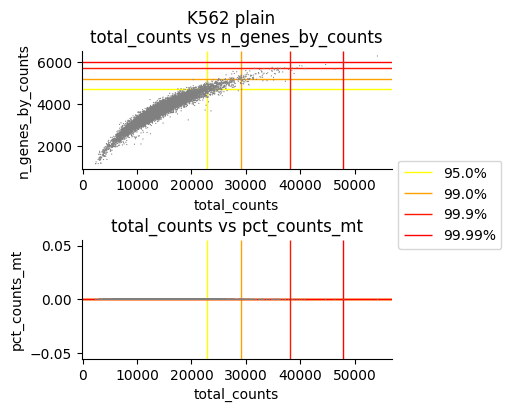

In [13]:
for k, v in {"K562 plain": df}.items():
    v.var['mt'] = v.var_names.str.startswith('MT-')
    sc.pp.calculate_qc_metrics(v, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    
    fig, ax = plt.subplots(2, 1, figsize=(4, 4))
    plt.subplots_adjust(hspace=.6)

    for a, y in zip(ax, ["n_genes_by_counts", "pct_counts_mt"]):
        sc.pl.scatter(v, x="total_counts", y=y, ax=a, size=3, show=False)
        area = [.95, .99, .999, .9999]
        xlims, ylims = a.get_xlim(), a.get_ylim()
        for xval, yval, q in zip(
            sce.pp.get_quantiles(v, "total_counts", area=area),
            sce.pp.get_quantiles(v, y, area=area),
            area
        ):
            kwargs = dict(
                zorder=-1, linewidth=1, 
                color=plt.cm.autumn_r(q ** 100)
            )
            a.vlines(xval, *ylims, **kwargs)
            a.hlines(yval, *xlims, label=f"{100 * q}%", **kwargs)
        if y == "n_genes_by_counts":
            a.legend(loc="center left", bbox_to_anchor=(1, -.3))
        a.set_title(f"total_counts vs {y}")
        a.set(xlim=xlims, ylim=ylims)
        

    fig.suptitle(
        k,
        verticalalignment="center",
        y=.96
    );

In [14]:
sc.pp.scrublet(df)

In [15]:
df.obs["predicted_doublet"].value_counts()

predicted_doublet
False    10689
True         2
Name: count, dtype: int64

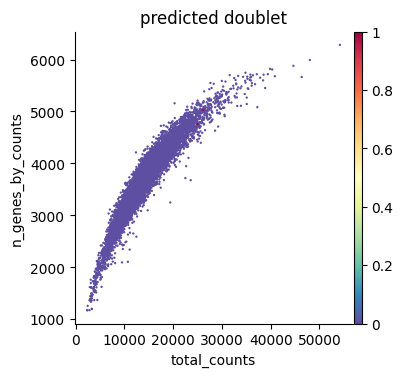

In [16]:
sc.pl.scatter(df, x='total_counts', y='n_genes_by_counts', color='predicted_doublet')

In [17]:
df = df[~df.obs['predicted_doublet'], :].copy()

In [18]:
sc.pp.normalize_total(df, target_sum=1e4)
sc.pp.log1p(df)

In [19]:
df_manifold = df.copy()

In [20]:
df_manifold.raw = df

<Axes: xlabel='mean expressions of genes', ylabel='dispersions of genes (not normalized)'>

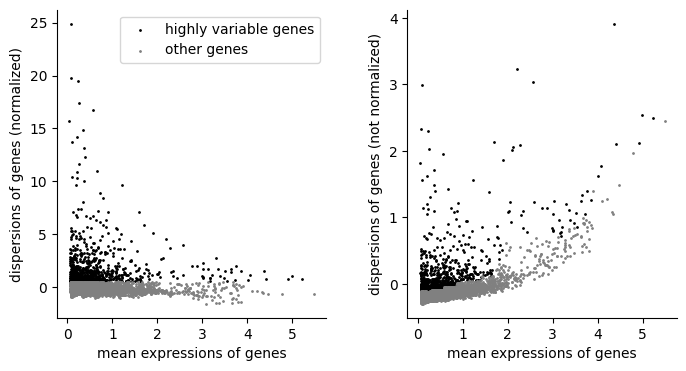

In [21]:
sc.pp.highly_variable_genes(
    df_manifold, min_mean=0.0125, max_mean=15, min_disp=0.5
)
sc.pl.highly_variable_genes(df_manifold, show=False)

In [22]:
df_manifold = df_manifold[:, df_manifold.var.highly_variable]
sc.pp.scale(df_manifold, max_value=10)

/home/yokano/.local/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [23]:
sc.tl.pca(df_manifold, svd_solver='arpack')

In [24]:
sc.pp.neighbors(df_manifold, n_pcs=50)

In [25]:
sc.tl.umap(df_manifold)

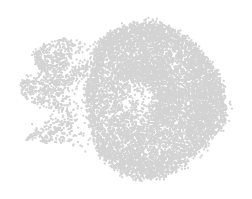

In [26]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df_manifold, ax=ax, size=10, show=False)
ax.axis("off");
ax.set_aspect('equal')
# ax.set(title=f"");

In [27]:
df.obsm["X_pca"] = df_manifold.obsm["X_pca"]
df.obsm["X_umap"] = df_manifold.obsm["X_umap"]

In [28]:
n_seacells = int(df.n_obs / 50)
model = SEACells.core.SEACells(
    df_manifold, build_kernel_on="X_pca", 
    n_SEACells=n_seacells, 
    n_waypoint_eigs=10
)
model.construct_kernel_matrix()
model.initialize_archetypes()
model.fit(min_iter=10, max_iter=50)

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/10689 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/10689 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/10689 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Done.
Sampling waypoints ...
Done.
Selecting 199 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|███████████████████████████████████████████| 24/24 [00:00<00:00, 53.41it/s]


Selecting 14 cells from greedy initialization.
Randomly initialized A matrix.
Setting convergence threshold at 0.19011
Starting iteration 1.
Completed iteration 1.
Converged after 9 iterations.
Starting iteration 10.
Completed iteration 10.
Converged after 10 iterations.


In [29]:
df.obs['SEACells'] = model.get_hard_assignments()

In [30]:
df.obs["SEACells"].value_counts()

SEACells
SEACell-29     145
SEACell-152    140
SEACell-24     139
SEACell-125    134
SEACell-61     133
              ... 
SEACell-51       5
SEACell-130      5
SEACell-164      5
SEACell-192      4
SEACell-113      4
Name: count, Length: 213, dtype: int64

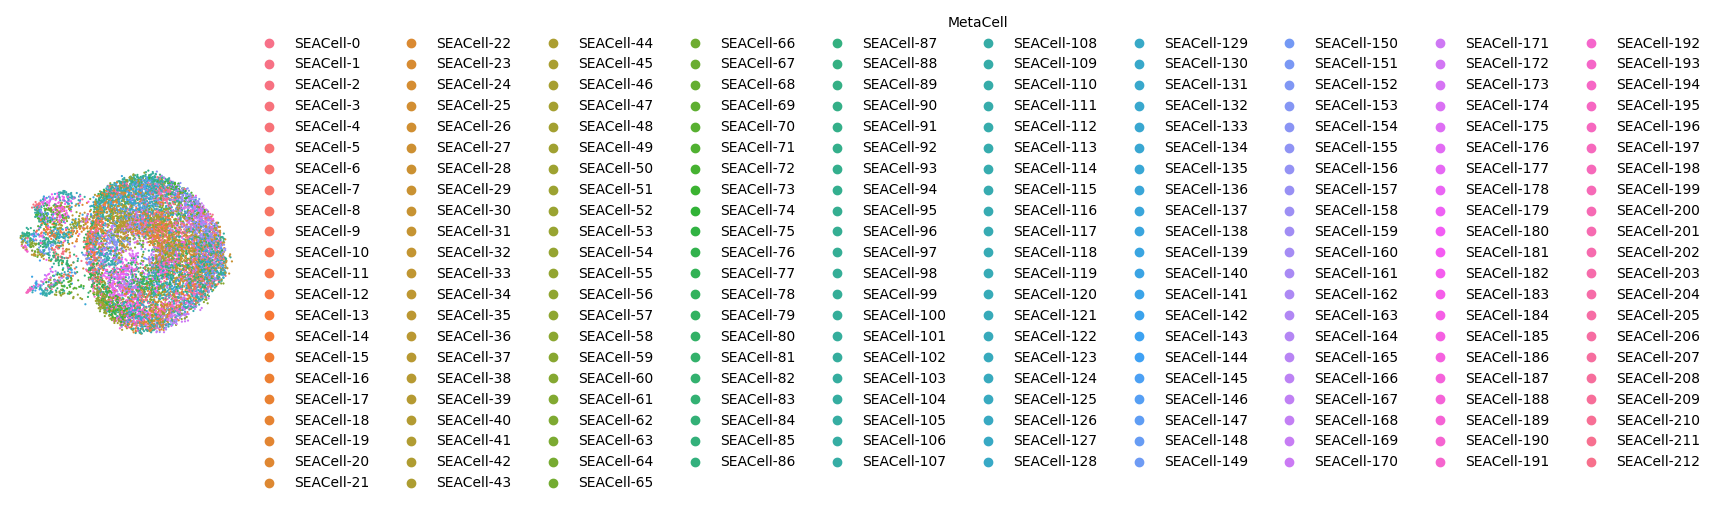

In [31]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, color="SEACells", 
    palette=sns.color_palette("husl", df.obs['SEACells'].unique().size)
)
ax.axis("off");

ax.set_aspect('equal')
ax.set(title="")
ax.legend(loc="center left", bbox_to_anchor=(1, .5), title="MetaCell", frameon=False, ncol=10)

In [32]:
hallmark = gp.get_library(name='MSigDB_Hallmark_2020', organism='Human')

In [33]:
hallmark.keys()

dict_keys(['TNF-alpha Signaling via NF-kB', 'Hypoxia', 'Cholesterol Homeostasis', 'Mitotic Spindle', 'Wnt-beta Catenin Signaling', 'TGF-beta Signaling', 'IL-6/JAK/STAT3 Signaling', 'DNA Repair', 'G2-M Checkpoint', 'Apoptosis', 'Notch Signaling', 'Adipogenesis', 'Estrogen Response Early', 'Estrogen Response Late', 'Androgen Response', 'Myogenesis', 'Protein Secretion', 'Interferon Alpha Response', 'Interferon Gamma Response', 'Apical Junction', 'Apical Surface', 'Hedgehog Signaling', 'Complement', 'Unfolded Protein Response', 'PI3K/AKT/mTOR  Signaling', 'mTORC1 Signaling', 'E2F Targets', 'Myc Targets V1', 'Myc Targets V2', 'Epithelial Mesenchymal Transition', 'Inflammatory Response', 'Xenobiotic Metabolism', 'Fatty Acid Metabolism', 'Oxidative Phosphorylation', 'Glycolysis', 'Reactive Oxygen Species Pathway', 'p53 Pathway', 'UV Response Up', 'UV Response Dn', 'Angiogenesis', 'heme Metabolism', 'Coagulation', 'IL-2/STAT5 Signaling', 'Bile Acid Metabolism', 'Pperoxisome', 'Allograft Rejec

In [34]:
name2id = {n: i for n, i in zip(df.var.gene_name, df.var.index)}
id2name = {i: n for n, i in name2id.items()}

In [35]:
loader = GeneCacheManager()

s_genes, g2m_genes = get_xor(
    loader.load(
        key="s_phase", func=gene_query, 
        gene_names=hallmark["E2F Targets"], 
        source=df.var["gene_name"]
    ),
    loader.load(
        key="g2m_phase", func=gene_query, 
        gene_names=hallmark["G2-M Checkpoint"], 
        source=df.var["gene_name"]
    )
)

[Cache Hit] Loading 's_phase'...
[Cache Hit] Loading 'g2m_phase'...


In [36]:
s_id = [name2id[g] for g in s_genes if g in name2id]
g2m_id = [name2id[g] for g in g2m_genes if g in name2id]

In [37]:
sce.tl.score_genes_cell_cycle(
    df,
    s_genes=s_id, 
    g2m_genes=g2m_id,
    use_raw=False
)

In [38]:
df.obs["phase"].value_counts()

phase
S       9698
G2/M     902
G1        89
Name: count, dtype: int64

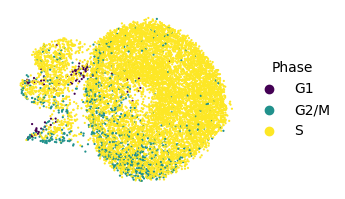

In [39]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="phase", palette="viridis")
ax.axis("off");

ax.set_aspect('equal')
ax.set(title="")
ax.legend(loc="center left", bbox_to_anchor=(1, .5), title="Phase", frameon=False)

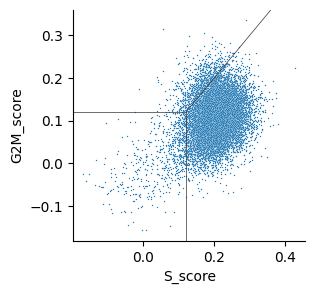

In [40]:
fig, ax = plt.subplots(figsize=(3, 3))

thresh = 0.12

sns.scatterplot(data=df.obs, x='S_score', y='G2M_score', ax=ax, s=1)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.vlines(thresh, ylim[0], thresh, color=".2", lw=.5)
ax.hlines(thresh, xlim[0], thresh, color=".2", lw=.5)
ax.plot(
    [thresh, max(xlim[1], ylim[1])], [thresh, max(xlim[1], ylim[1])],
    color=".2", lw=.5
)
ax.set_xlim(*xlim), ax.set_ylim(*ylim);

In [41]:
def currate_phase(adata, thresh: float = 0):
    s_phase = adata.obs["S_score"].map(lambda s: 10 if s >= thresh else 0)
    g2m_phase = adata.obs["G2M_score"].map(lambda s: 100 if s >= thresh else 0)
    g2m_is_larger = (adata.obs["G2M_score"] - adata.obs["S_score"]).map(
        lambda s: 1 if s > 0 else 0
    )
    adata.obs["phase"] = (s_phase + g2m_phase + g2m_is_larger).map(
        lambda s: {0: "G1", 1: "G1", 10: "S", 101: "G2/M", 110: "S", 111: "G2/M"}[s]
    )

In [42]:
currate_phase(df, .12)

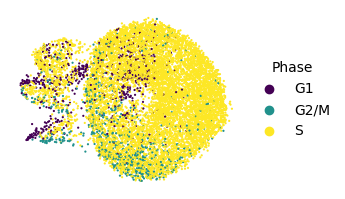

In [43]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="phase", palette="viridis")
ax.axis("off");

ax.set_aspect('equal')
ax.set(title="")
ax.legend(loc="center left", bbox_to_anchor=(1, .5), title="Phase", frameon=False)

In [44]:
df.obs["phase"].value_counts()

phase
S       9246
G2/M     785
G1       658
Name: count, dtype: int64

In [45]:
df.write("K562_processed.h5ad")

In [46]:
loader.load(
    key="s_phase_exclusive", func=lambda gene_names: gene_names, 
    gene_names=s_genes
)

loader.load(
    key="g2m_phase_exclusive", func=lambda gene_names: gene_names,
    gene_names=g2m_genes
)

[Cache Hit] Loading 's_phase_exclusive'...
[Cache Hit] Loading 'g2m_phase_exclusive'...


['INCENP',
 'MTF2',
 'TTK',
 'SLC7A1',
 'KNL1',
 'UPF1',
 'POLQ',
 'ORC5',
 'KATNA1',
 'KIF5B',
 'KIF15',
 'SLC7A5',
 'SAP30',
 'PRMT5',
 'WRN',
 'ABL1',
 'NUSAP1',
 'CBX1',
 'TFDP1',
 'HMGN2',
 'CUL5',
 'SRSF10',
 'CDC6',
 'HOXC10',
 'MAPK14',
 'SLC12A2',
 'TOP1',
 'PBK',
 'CDC7',
 'NUMA1',
 'ODC1',
 'HIRA',
 'RBL1',
 'H2AFV',
 'SMAD3',
 'UCK2',
 'ARID4A',
 'CCNF',
 'PRPF4B',
 'BUB1',
 'MNAT1',
 'G3BP1',
 'GINS2',
 'TGFB1',
 'NEK2',
 'CASP8AP2',
 'E2F1',
 'TNPO2',
 'CUL3',
 'CHAF1A',
 'HIST1H2BK',
 'NSD2',
 'TPX2',
 'SFPQ',
 'AMD1',
 'PML',
 'SMARCC1',
 'LIG3',
 'SS18',
 'EXO1',
 'DBF4',
 'CUL4A',
 'TLE3',
 'KMT5A',
 'PAFAH1B1',
 'E2F3',
 'KPNB1',
 'HSPA8',
 'MEIS2',
 'CCNA2',
 'MPP1',
 'NCL',
 'STIL',
 'SQLE',
 'CCNT1',
 'ATF5',
 'SNRPD1',
 'DR1',
 'MAP3K20',
 'NUP98',
 'ODF2',
 'FBXO5',
 'KIF23',
 'SLC38A1',
 'CENPF',
 'PURA',
 'TROAP',
 'E2F2',
 'CDC45',
 'YTHDC1',
 'NUP50',
 'EWSR1',
 'CHMP1A',
 'FOXN3',
 'MT2A',
 'KIF11',
 'CDC27',
 'FANCC',
 'HIF1A',
 'PRC1',
 'TENT4A',
 'RAD23B

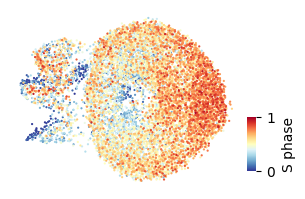

In [47]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, colorbar_loc=None,
    color="S_score_prob", vmax=1, vmin=0, cmap="RdYlBu_r"
)

mappable = ax.collections[0]
cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("S phase", rotation=90, labelpad=5)
cbar.outline.set_visible(False)

ax.set_aspect('equal')
ax.axis("off");
ax.set(title="");

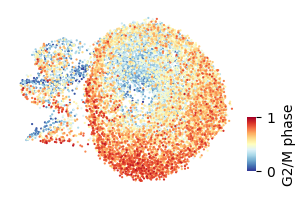

In [48]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, colorbar_loc=None,
    color="G2M_score_prob", vmax=1, vmin=0, cmap="RdYlBu_r"
)

mappable = ax.collections[0]
cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("G2/M phase", rotation=90, labelpad=5)
cbar.outline.set_visible(False)

ax.set_aspect('equal')
ax.axis("off");
ax.set(title="");

Text(0.5, 0.93, 'S-phase signature')

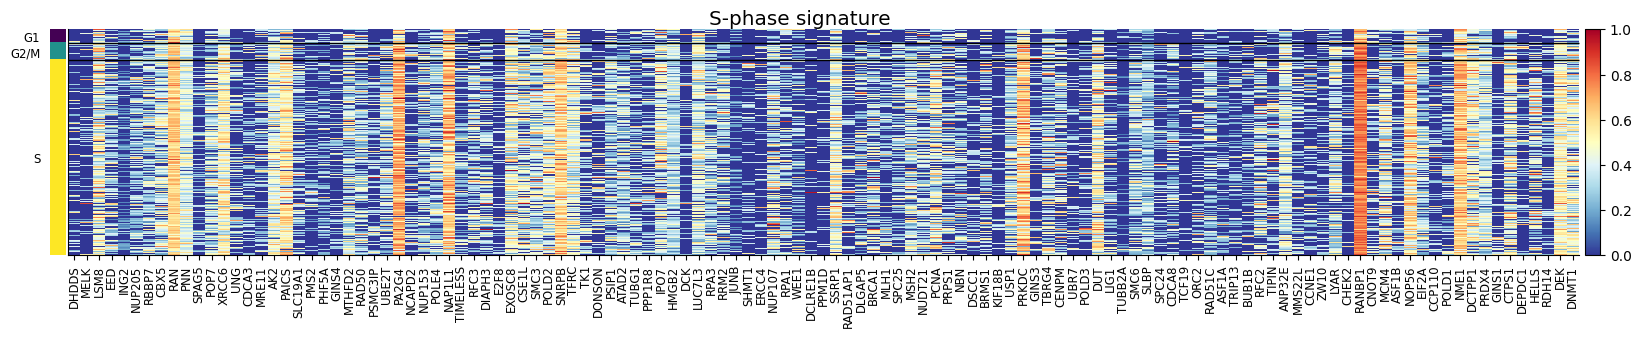

In [49]:
axes_dict = sc.pl.heatmap(
    df,
    var_names=s_genes,
    groupby="phase",
    gene_symbols="gene_name",
    standard_scale="var",
    show_gene_labels=True,
    swap_axes=False,
    figsize=(20, 3),
    show=False,
    cmap="RdYlBu_r"
)

heatmap_ax, group_ax = axes_dict.values()
group_ax.set(ylabel="");
group_ax.set_xticklabels(group_ax.get_xticklabels(), rotation=0)


fig = heatmap_ax.figure
fig.suptitle(
    "S-phase signature", 
    fontsize="x-large",
    y=0.93
)

Text(0.5, 0.93, 'G2/M-phase signature')

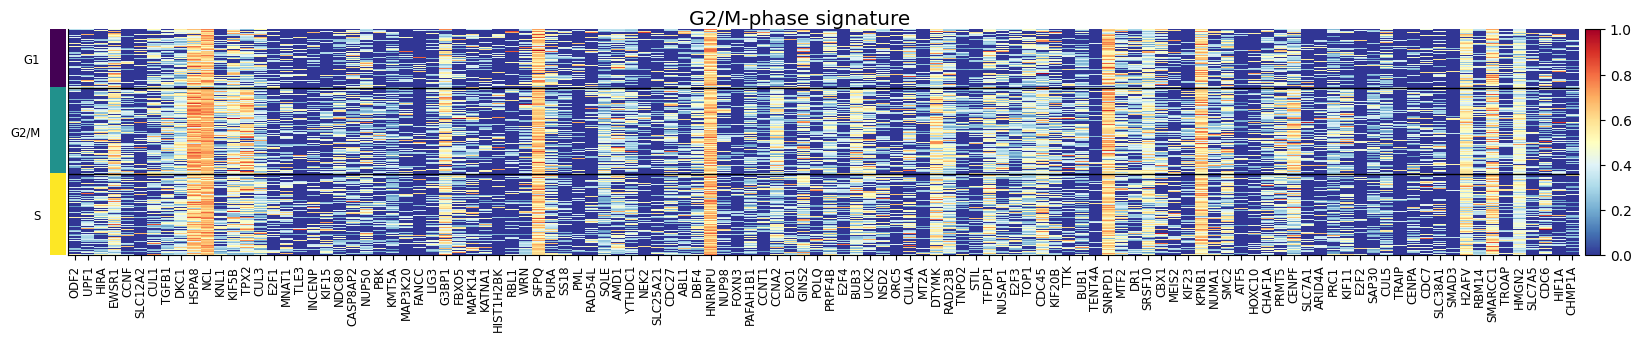

In [76]:
axes_dict = sc.pl.heatmap(
    df,
    var_names=g2m_genes,
    groupby="phase",
    gene_symbols="gene_name",
    standard_scale="var",
    show_gene_labels=True,
    swap_axes=False,
    figsize=(20, 3),
    show=False,
    cmap="RdYlBu_r"
)

heatmap_ax, group_ax = axes_dict.values()
group_ax.set(ylabel="");
group_ax.set_xticklabels(group_ax.get_xticklabels(), rotation=0)

fig = heatmap_ax.figure
fig.suptitle(
    "G2/M-phase signature", 
    fontsize="x-large",
    y=0.93
)

In [30]:
mapk_genes = loader.load(
    key="mapk", func=gene_query, 
    gene_names=hallmark["KRAS Signaling Up"], 
    source=df.var["gene_name"]
)
mapk_id = [name2id[g] for g in mapk_genes if g in name2id]

[Cache Hit] Loading 'mapk'...


In [31]:
sce.tl.prob_genes(
    df, 
    gene_list=mapk_id, 
    score_name='MAPK_score', 
    ctrl_size=50, 
    n_bins=25, 
    use_raw=False
)

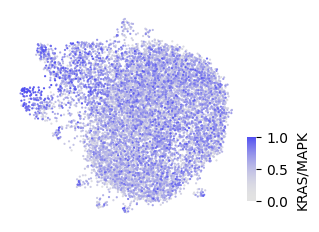

In [32]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, colorbar_loc=None,
    color="MAPK_score_prob", vmax=1, vmin=0, cmap=seurat
)

mappable = ax.collections[0]
cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("KRAS/MAPK", rotation=90, labelpad=5)
cbar.outline.set_visible(False)

ax.set_aspect('equal')
ax.axis("off");
ax.set(title="");

Text(0.5, 0.93, 'KRAS signaling signature')

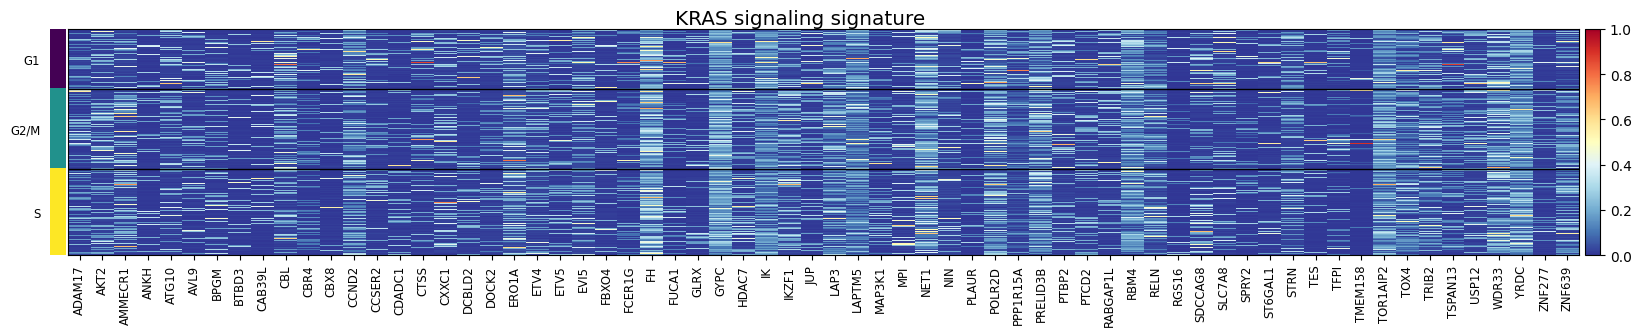

In [80]:
axes_dict = sc.pl.heatmap(
    df,
    var_names=mapk_genes,
    groupby="phase",
    gene_symbols="gene_name",
    standard_scale="var",
    show_gene_labels=True,
    swap_axes=False,
    figsize=(20, 3),
    show=False,
    cmap="RdYlBu_r"
)

heatmap_ax, group_ax = axes_dict.values()
heatmap_ax.set(xlabel="")
group_ax.set(ylabel="");
group_ax.set_xticklabels(group_ax.get_xticklabels(), rotation=0)

fig = heatmap_ax.figure

fig.suptitle(
    "KRAS signaling signature", 
    fontsize="x-large",
    y=0.93
)

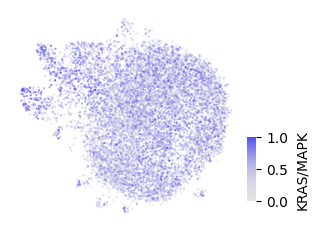

In [35]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, colorbar_loc=None,
    color="MAPK_score_prob", vmax=1, vmin=0, cmap=seurat, 
    alpha=df.obs["MAPK_score_prob"]
)

mappable = ax.collections[0]
cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("KRAS/MAPK", rotation=90, labelpad=5)
cbar.outline.set_visible(False)

ax.set_aspect('equal')
ax.axis("off");
ax.set(title="");

In [36]:
ints1x = ["INTS10", "INTS13", "INTS14", "C7orf26"]
cleavage = ["INTS3", "INTS4", "INTS9", "INTS11"]
shoulder = ["INTS1", "INTS2", "INTS5", "INTS7", "INTS8"]

In [40]:
ints1x_genes = loader.load(
    key="ic_module1", func=gene_query, 
    gene_names=ints1x, 
    source=df.var["gene_name"]
)
ints1x_id = [name2id[g] for g in ints1x_genes if g in name2id]

INFO:biothings.client:querying 1-4 ...


[Generating] Running recipe for 'ic_module1'... (Update=False)


INFO:biothings.client:Finished.


[4/4] queries mapped to the source.
 -> Returning 4 unique genes present in data.
 -> Saved to /rshare1/ZETTAI_path_WA_slash_home_KARA/home/yokano/WhyDOE_RWD_Analysis/tools/bioinfo/gene_cache/ic_module1.txt


In [41]:
cleavage_genes = loader.load(
    key="ic_module2", func=gene_query, 
    gene_names=cleavage, 
    source=df.var["gene_name"]
)
cleavage_id = [name2id[g] for g in cleavage_genes if g in name2id]

INFO:biothings.client:querying 1-4 ...


[Generating] Running recipe for 'ic_module2'... (Update=False)


INFO:biothings.client:Finished.


[4/4] queries mapped to the source.
 -> Returning 4 unique genes present in data.
 -> Saved to /rshare1/ZETTAI_path_WA_slash_home_KARA/home/yokano/WhyDOE_RWD_Analysis/tools/bioinfo/gene_cache/ic_module2.txt


In [42]:
shoulder_genes = loader.load(
    key="ic_module3", func=gene_query, 
    gene_names=shoulder, 
    source=df.var["gene_name"]
)
shoulder_id = [name2id[g] for g in shoulder_genes if g in name2id]

INFO:biothings.client:querying 1-5 ...


[Generating] Running recipe for 'ic_module3'... (Update=False)


INFO:biothings.client:Finished.


[5/5] queries mapped to the source.
 -> Returning 5 unique genes present in data.
 -> Saved to /rshare1/ZETTAI_path_WA_slash_home_KARA/home/yokano/WhyDOE_RWD_Analysis/tools/bioinfo/gene_cache/ic_module3.txt


In [43]:
for i, gene_list in enumerate([ints1x_id, cleavage_id, shoulder_id]):
    sce.tl.prob_genes(
        df, 
        gene_list=gene_list, 
        score_name=f"Module #{i + 1}", 
        use_raw=False
    )

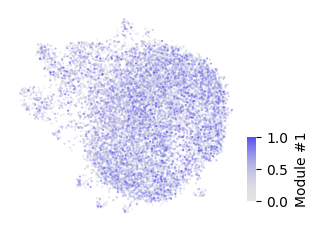

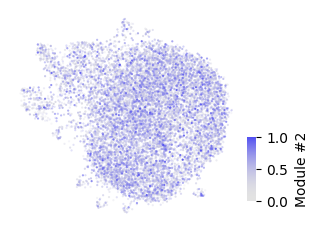

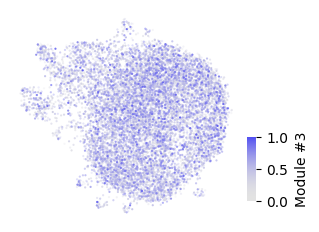

In [66]:
for i, key in enumerate([f"Module #{i + 1}_prob" for i in range(3)]):
    fig, ax = plt.subplots(figsize=(3, 3))
    sc.pl.umap(
        df, ax=ax, size=10, show=False, colorbar_loc=None,
        color=key, vmax=1, vmin=0, 
        cmap=seurat, 
        alpha=df.obs[f"Module #{i + 1}_prob"]
    )

    mappable = ax.collections[0]
    cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
    cbar = plt.colorbar(mappable, cax=cax)
    cbar.set_label(f"Module #{i + 1}", rotation=90, labelpad=5)
    cbar.outline.set_visible(False)
    
    ax.set_aspect('equal')
    ax.axis("off");
    ax.set(title="");

Text(0.5, 0.93, 'Integrator complex')

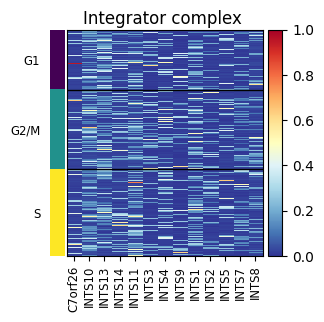

In [77]:
axes_dict = sc.pl.heatmap(
    df,
    var_names=ints1x_genes + cleavage_genes + shoulder_genes,
    groupby="phase",
    gene_symbols="gene_name",
    standard_scale="var",
    show_gene_labels=True,
    swap_axes=False,
    figsize=(3, 3),
    show=False,
    cmap="RdYlBu_r"
)

heatmap_ax, group_ax = axes_dict.values()
heatmap_ax.set(xlabel="")
group_ax.set(ylabel="");
group_ax.set_xticklabels(group_ax.get_xticklabels(), rotation=0)

fig = heatmap_ax.figure

fig.suptitle(
    "Integrator complex", 
    fontsize="large",
    y=0.93
)

In [85]:
import seaborn as sns

/home/yokano/.local/lib/python3.12/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


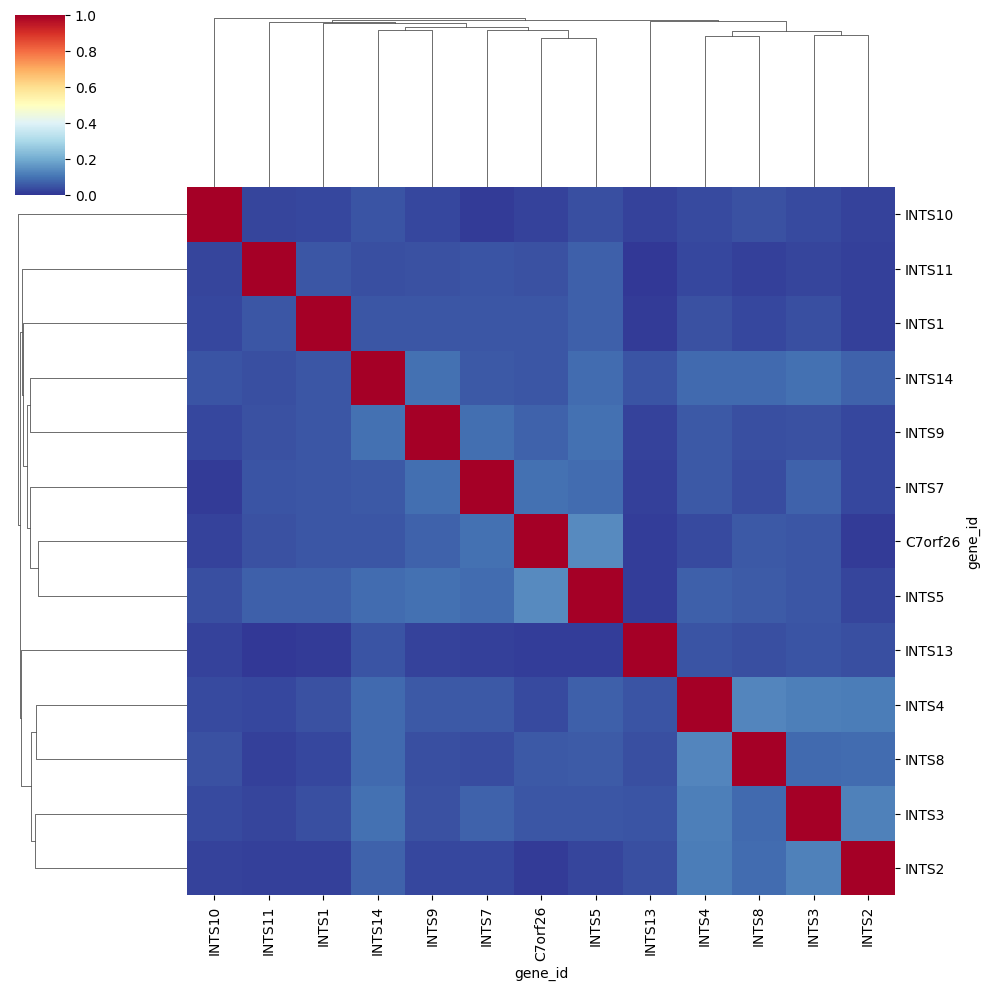

In [103]:
sns.clustermap(
    df[:, ints1x_id + cleavage_id + shoulder_id].to_df().corr("kendall").abs(),
    vmax=1, vmin=0, cmap="RdYlBu_r", square=True,
    xticklabels=ints1x_genes + cleavage_genes + shoulder_genes,
    yticklabels=ints1x_genes + cleavage_genes + shoulder_genes
)

<Axes: xlabel='gene_id', ylabel='gene_id'>

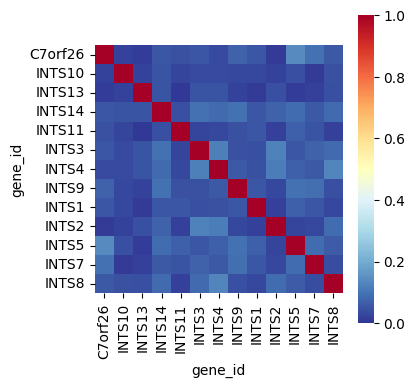

In [94]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(
    df[:, ints1x_id + cleavage_id + shoulder_id].to_df().corr("kendall").abs(),
    vmax=1, vmin=0, cmap="RdYlBu_r", ax=ax, square=True,
    xticklabels=ints1x_genes + cleavage_genes + shoulder_genes,
    yticklabels=ints1x_genes + cleavage_genes + shoulder_genes
)

<Axes: xlabel='gene_id', ylabel='gene_id'>

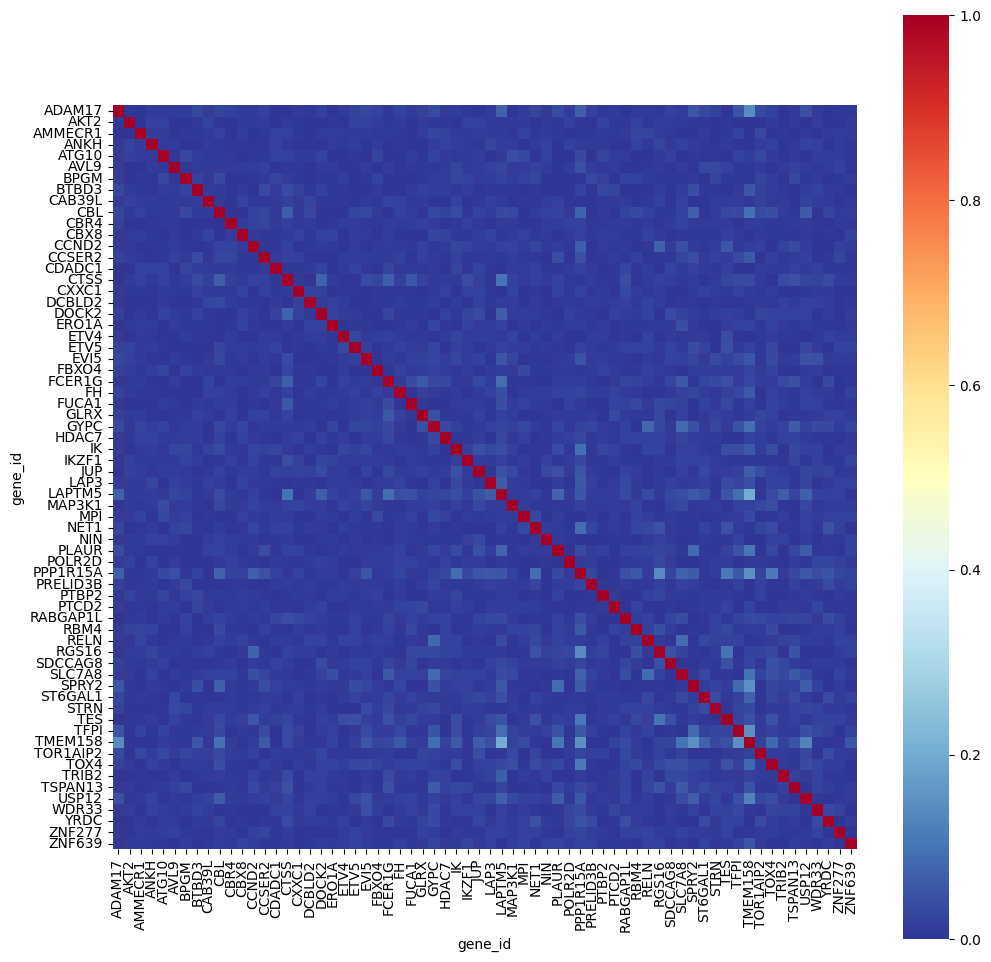

In [118]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    df[:, mapk_id].to_df().corr().abs(),
    vmax=1, vmin=0, cmap="RdYlBu_r", ax=ax, square=True,
    xticklabels=mapk_genes,
    yticklabels=mapk_genes
)

In [107]:
hallmark.keys()

dict_keys(['TNF-alpha Signaling via NF-kB', 'Hypoxia', 'Cholesterol Homeostasis', 'Mitotic Spindle', 'Wnt-beta Catenin Signaling', 'TGF-beta Signaling', 'IL-6/JAK/STAT3 Signaling', 'DNA Repair', 'G2-M Checkpoint', 'Apoptosis', 'Notch Signaling', 'Adipogenesis', 'Estrogen Response Early', 'Estrogen Response Late', 'Androgen Response', 'Myogenesis', 'Protein Secretion', 'Interferon Alpha Response', 'Interferon Gamma Response', 'Apical Junction', 'Apical Surface', 'Hedgehog Signaling', 'Complement', 'Unfolded Protein Response', 'PI3K/AKT/mTOR  Signaling', 'mTORC1 Signaling', 'E2F Targets', 'Myc Targets V1', 'Myc Targets V2', 'Epithelial Mesenchymal Transition', 'Inflammatory Response', 'Xenobiotic Metabolism', 'Fatty Acid Metabolism', 'Oxidative Phosphorylation', 'Glycolysis', 'Reactive Oxygen Species Pathway', 'p53 Pathway', 'UV Response Up', 'UV Response Dn', 'Angiogenesis', 'heme Metabolism', 'Coagulation', 'IL-2/STAT5 Signaling', 'Bile Acid Metabolism', 'Pperoxisome', 'Allograft Rejec

In [171]:
_genes = loader.load(
    key="apoptosis", func=gene_query, 
    gene_names=hallmark["Apoptosis"], 
    source=df.var["gene_name"]
)
_id = [name2id[g] for g in _genes if g in name2id]

INFO:biothings.client:querying 1-161 ...


[Generating] Running recipe for 'apoptosis'... (Update=False)


INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


Not found in source: AIFM3 (Candidates: ['AIFM3', 'AIFL'])
Not found in source: ANXA1 (Candidates: ['ANXA1', 'LPC1', 'ANX1'])
Not found in source: APP (Candidates: ['APP', 'CTFgamma', 'preA4', 'PN2', 'APPI', 'ABETA', 'AAA', 'CVAP', 'AD1', 'ABPP', 'alpha-sAPP', 'PN-II'])
Not found in source: ATF3 (Candidates: ['ATF3'])
Not found in source: AVPR1A (Candidates: ['AVPR1A', 'AVPR V1a', 'V1aR', 'AVPR1'])
Not found in source: BCL2L10 (Candidates: ['bcl2-L-10', 'Boo', 'BCL2L10', 'BCL-B', 'Diva'])
Not found in source: BGN (Candidates: ['PG-S1', 'PGI', 'BGN', 'MRLS', 'SLRR1A', 'DSPG1', 'SEMDX'])
Not found in source: BIK (Candidates: ['BIP1', 'BIK', 'BP4', 'NBK'])
Not found in source: BIRC3 (Candidates: ['HIAP1', 'RNF49', 'HAIP1', 'BIRC3', 'MALT2', 'IAP-1', 'API2', 'AIP1', 'CIAP2', 'c-IAP2', 'MIHC'])
Not found in source: BMF (Candidates: ['BMF'])
Not found in source: BMP2 (Candidates: ['BDA2', 'BMP2', 'SSFSC1', 'SSFSC', 'BMP2A'])
Not found in source: CASP1 (Candidates: ['IL1BC', 'P45', 'CASP1', '

In [172]:
sce.tl.prob_genes(
    df, 
    gene_list=_id, 
    score_name='Apoptosis', 
    ctrl_size=50, 
    n_bins=25, 
    use_raw=False
)

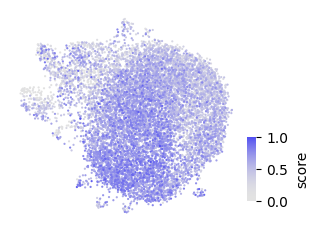

In [173]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, colorbar_loc=None,
    color="G2M_score_prob", vmax=1, vmin=0, cmap=seurat
)

mappable = ax.collections[0]
cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("score", rotation=90, labelpad=5)
cbar.outline.set_visible(False)

ax.set_aspect('equal')
ax.axis("off");
ax.set(title="");

Text(0.5, 0.93, 'score')

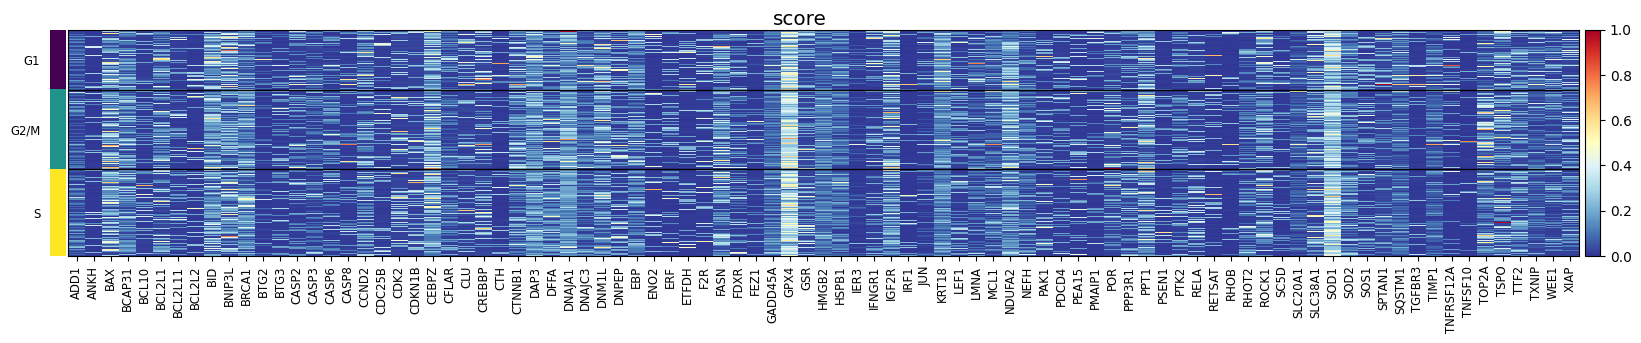

In [174]:
axes_dict = sc.pl.heatmap(
    df,
    var_names=_genes,
    groupby="phase",
    gene_symbols="gene_name",
    standard_scale="var",
    show_gene_labels=True,
    swap_axes=False,
    figsize=(20, 3),
    show=False,
    cmap="RdYlBu_r"
)

heatmap_ax, group_ax = axes_dict.values()
heatmap_ax.set(xlabel="")
group_ax.set(ylabel="");
group_ax.set_xticklabels(group_ax.get_xticklabels(), rotation=0)

fig = heatmap_ax.figure

fig.suptitle(
    "score", 
    fontsize="x-large",
    y=0.93
)

<Axes: xlabel='gene_id', ylabel='gene_id'>

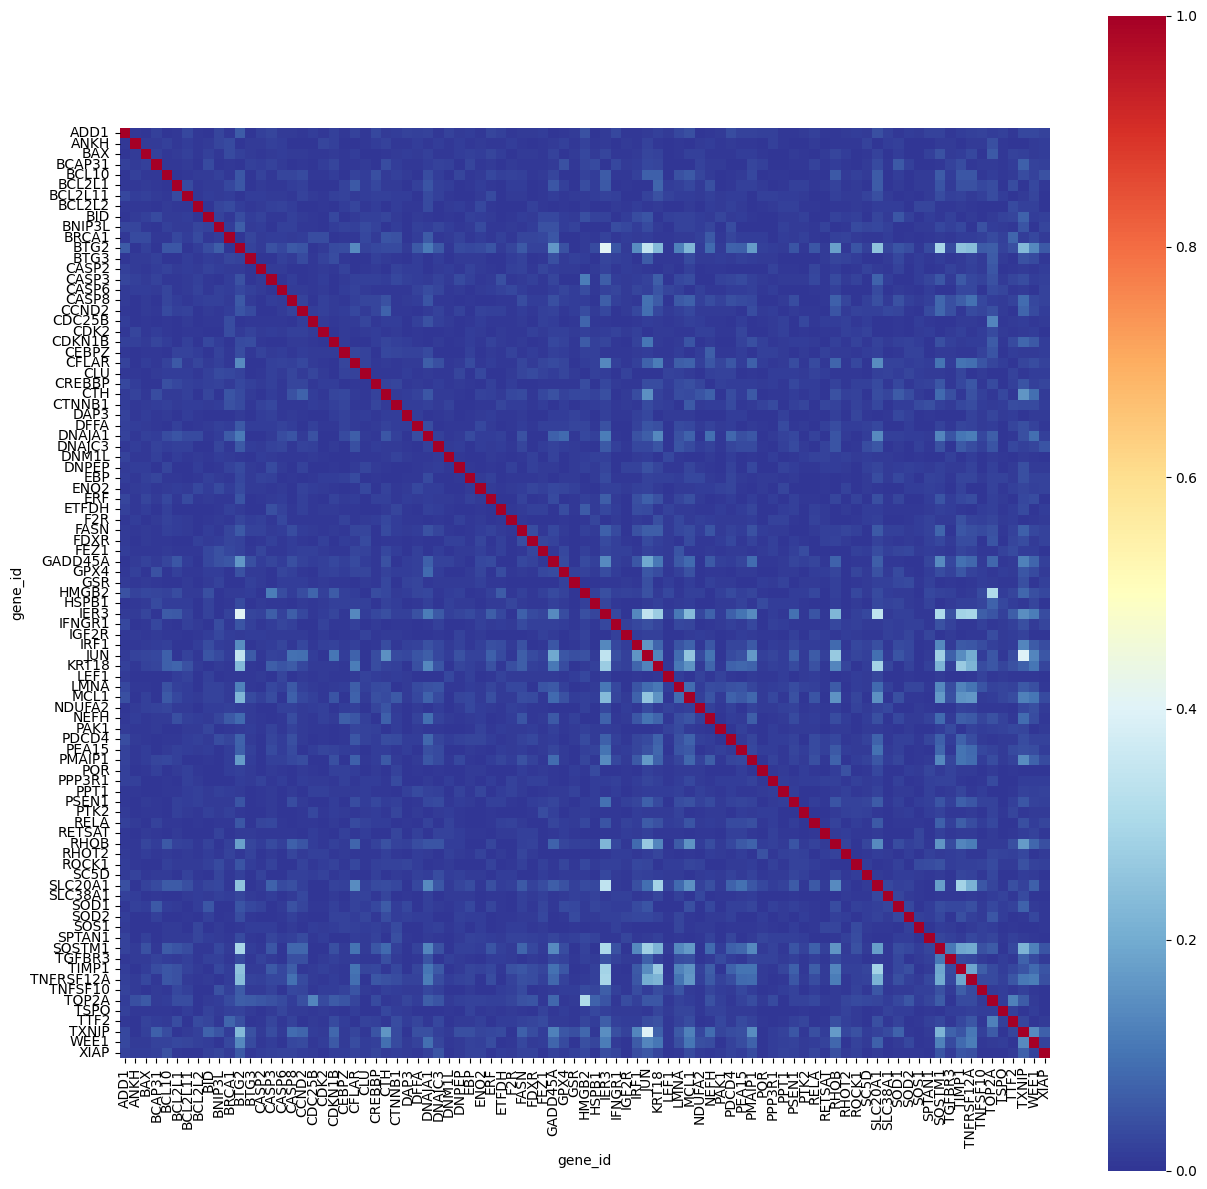

In [175]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(
    df[:, _id].to_df().corr().abs(),
    vmax=1, vmin=0, cmap="RdYlBu_r", ax=ax, square=True,
    xticklabels=_genes,
    yticklabels=_genes
)

In [107]:
hallmark.keys()

dict_keys(['TNF-alpha Signaling via NF-kB', 'Hypoxia', 'Cholesterol Homeostasis', 'Mitotic Spindle', 'Wnt-beta Catenin Signaling', 'TGF-beta Signaling', 'IL-6/JAK/STAT3 Signaling', 'DNA Repair', 'G2-M Checkpoint', 'Apoptosis', 'Notch Signaling', 'Adipogenesis', 'Estrogen Response Early', 'Estrogen Response Late', 'Androgen Response', 'Myogenesis', 'Protein Secretion', 'Interferon Alpha Response', 'Interferon Gamma Response', 'Apical Junction', 'Apical Surface', 'Hedgehog Signaling', 'Complement', 'Unfolded Protein Response', 'PI3K/AKT/mTOR  Signaling', 'mTORC1 Signaling', 'E2F Targets', 'Myc Targets V1', 'Myc Targets V2', 'Epithelial Mesenchymal Transition', 'Inflammatory Response', 'Xenobiotic Metabolism', 'Fatty Acid Metabolism', 'Oxidative Phosphorylation', 'Glycolysis', 'Reactive Oxygen Species Pathway', 'p53 Pathway', 'UV Response Up', 'UV Response Dn', 'Angiogenesis', 'heme Metabolism', 'Coagulation', 'IL-2/STAT5 Signaling', 'Bile Acid Metabolism', 'Pperoxisome', 'Allograft Rejec

In [127]:
heme_genes = loader.load(
    key="heme", func=gene_query, 
    gene_names=hallmark["heme Metabolism"], 
    source=df.var["gene_name"]
)
heme_id = [name2id[g] for g in heme_genes if g in name2id]

INFO:biothings.client:querying 1-200 ...


[Generating] Running recipe for 'heme'... (Update=False)


INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


Not found in source: ABCG2 (Candidates: ['UAQTL1', 'MXR1', 'EST157481', 'BCRP', 'CDw388', 'BCRP1', 'CDw338', 'ABCG2', 'MXR', 'MXR-1', 'CD338', 'GOUT1', 'MRX', 'BMDP', 'ABC15', 'ABCP'])
Not found in source: ACKR1 (Candidates: ['FY', 'ACKR1', 'GpFy', 'Dfy', 'DARC', 'DARC/ACKR1', 'CCBP1', 'WBCQ1', 'CD234', 'GPD'])
Not found in source: ACSL6 (Candidates: ['ACS2', 'LACS5', 'FACL6', 'LACS 6', 'LACS2', 'ACSL6'])
Not found in source: ADD2 (Candidates: ['ADD2', 'ADDB'])
Not found in source: AHSP (Candidates: ['EDRF', 'ERAF', 'AHSP'])
Not found in source: ALAD (Candidates: ['ALAD', 'ALADH', 'PBGS'])
Not found in source: ALDH1L1 (Candidates: ['FTHFD', 'FDH', '10-FTHFDH', '10-fTHF', 'ALDH1L1'])
Not found in source: AQP3 (Candidates: ['GIL', 'AQP3', 'AQP-3'])
Not found in source: ASNS (Candidates: ['ASNS', 'TS11', 'ASNSD'])
Not found in source: C3 (Candidates: ['AHUS5', 'C3b', 'CPAMD1', 'C3a', 'C3', 'ARMD9', 'ASP', 'HEL-S-62p'])
Not found in source: CA1 (Candidates: ['CA1', 'CAB', 'Car1', 'CA-I', '

In [128]:
sce.tl.prob_genes(
    df, 
    gene_list=hypo_id, 
    score_name='Heme_Metabolism_score', 
    ctrl_size=50, 
    n_bins=25, 
    use_raw=False
)

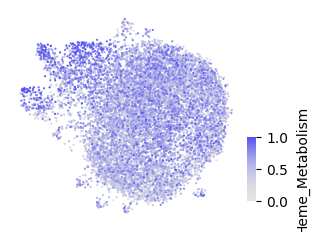

In [129]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(
    df, ax=ax, size=10, show=False, colorbar_loc=None,
    color="Heme_Metabolism_score_prob", vmax=1, vmin=0, cmap=seurat
)

mappable = ax.collections[0]
cax = ax.inset_axes([1.02, 0.1, 0.04, 0.3])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label("Heme_Metabolism", rotation=90, labelpad=5)
cbar.outline.set_visible(False)

ax.set_aspect('equal')
ax.axis("off");
ax.set(title="");

Text(0.5, 0.93, 'Heme Metabolism signaling signature')

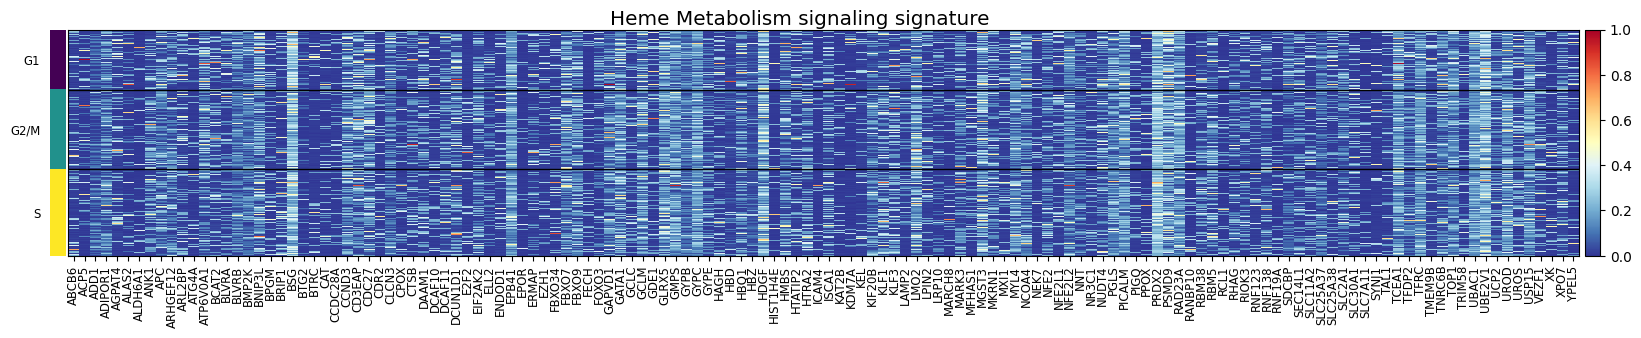

In [130]:
axes_dict = sc.pl.heatmap(
    df,
    var_names=heme_genes,
    groupby="phase",
    gene_symbols="gene_name",
    standard_scale="var",
    show_gene_labels=True,
    swap_axes=False,
    figsize=(20, 3),
    show=False,
    cmap="RdYlBu_r"
)

heatmap_ax, group_ax = axes_dict.values()
heatmap_ax.set(xlabel="")
group_ax.set(ylabel="");
group_ax.set_xticklabels(group_ax.get_xticklabels(), rotation=0)

fig = heatmap_ax.figure

fig.suptitle(
    "Heme Metabolism signaling signature", 
    fontsize="x-large",
    y=0.93
)

<Axes: xlabel='gene_id', ylabel='gene_id'>

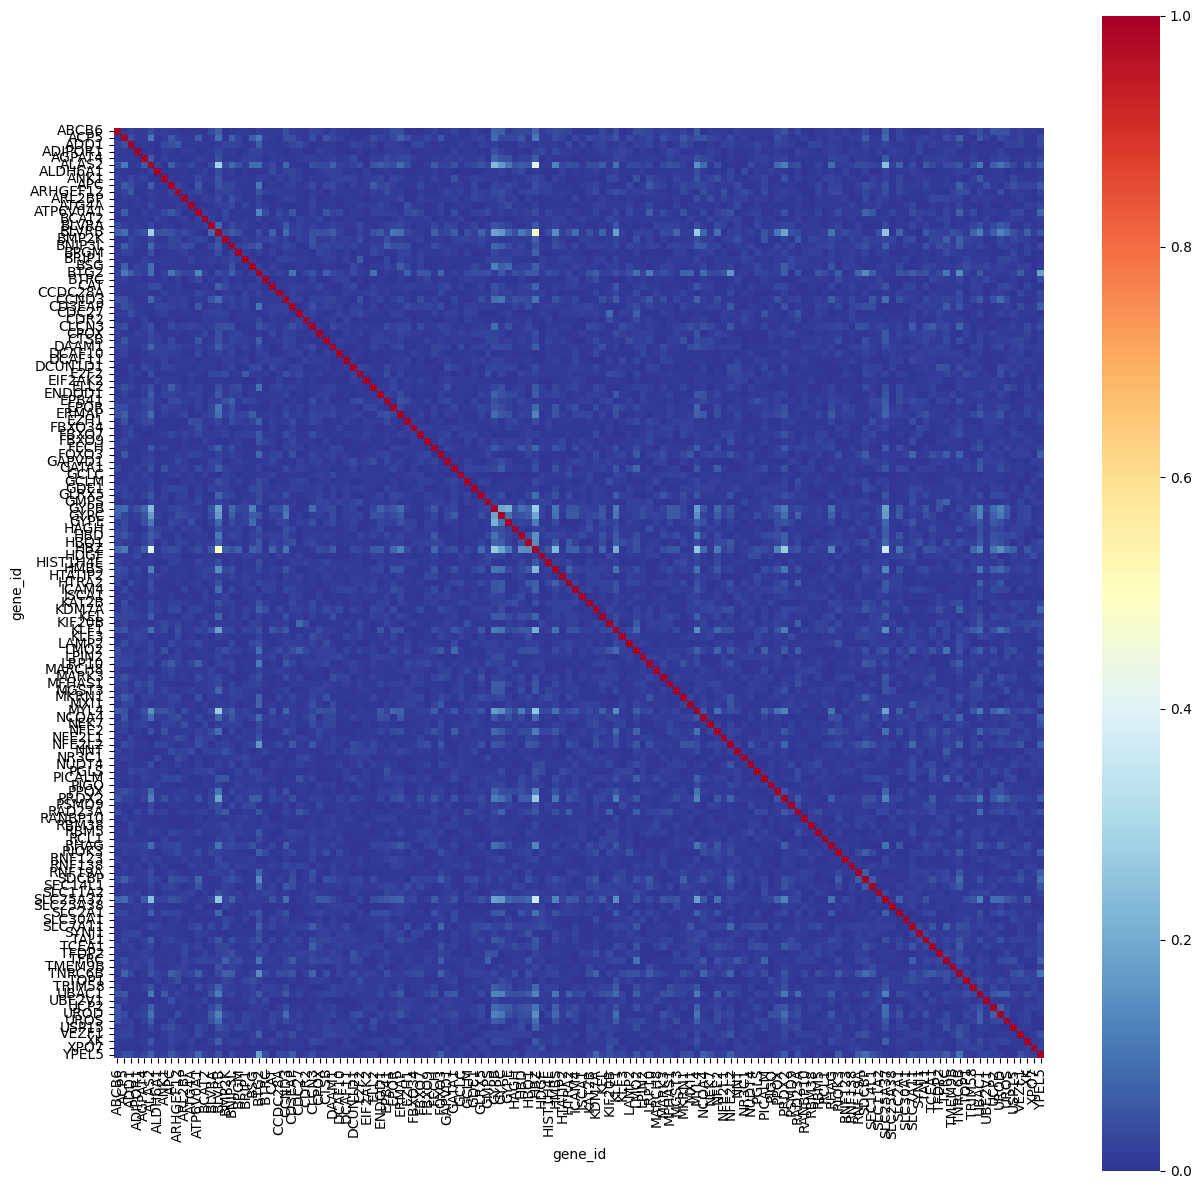

In [131]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(
    df[:, heme_id].to_df().corr().abs(),
    vmax=1, vmin=0, cmap="RdYlBu_r", ax=ax, square=True,
    xticklabels=heme_genes,
    yticklabels=heme_genes
)

In [160]:
import numpy as np
from scipy.stats import zscore

In [79]:
min_score = df.obs['S_score'].min()
shifted_score = df.obs['S_score'] - min_score

In [161]:
sigmoid = lambda score: 1 / (1 + np.exp(-zscore(score, nan_policy="omit")))

In [162]:
df.obs['S_score_sigmoid'] = sigmoid(df.obs["S_score"])

In [163]:
df.obs['S_score_sigmoid'].describe()

count    10691.000000
mean         0.496242
std          0.209907
min          0.026733
25%          0.323754
50%          0.480607
75%          0.661024
max          0.988641
Name: S_score_sigmoid, dtype: float64

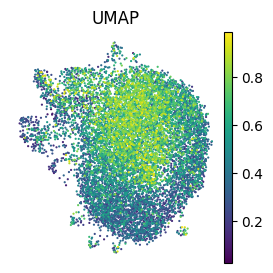

In [164]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="S_score_sigmoid")
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

In [165]:
mixture

(0.31529411764705884, 0.30776470588235294, 0.944235294117647, 1.1)

In [166]:
3 * np.array(plt.cm.Purples(.6))

array([1.57647059, 1.53882353, 2.22117647, 3.        ])

In [228]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import LinearSegmentedColormap

mixture = tuple((3 * np.array(plt.cm.Purples(.6)) + 2.5 * np.array([0, 0, 1, 1])) / 5)

cdict = {
    "red": [
        (x, y0, y1) for x, y0, y1 in zip(
            np.linspace(0, 1, 256),
            np.linspace(plt.cm.Greys(.2)[0], mixture[0], 256),
            np.linspace(plt.cm.Greys(.2)[0], mixture[0], 256),  
        )
    ],
    "green": [
        (x, y0, y1) for x, y0, y1 in zip(
            np.linspace(0, 1, 256),
            np.linspace(plt.cm.Greys(.2)[1], mixture[1], 256),
            np.linspace(plt.cm.Greys(.2)[1], mixture[1], 256),  
        )
    ],
    "blue": [
        (x, y0, y1) for x, y0, y1 in zip(
            np.linspace(0, 1, 256),
            np.linspace(plt.cm.Greys(.2)[2], mixture[2], 256),
            np.linspace(plt.cm.Greys(.2)[2], mixture[2], 256),  
        )
    ],
}

seurat = LinearSegmentedColormap("seurat", cdict, gamma=2)

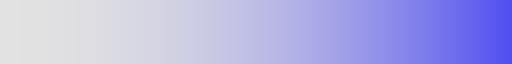

In [229]:
seurat

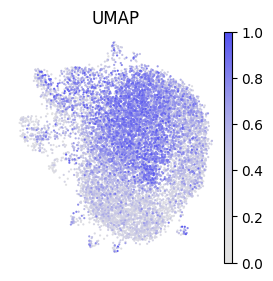

In [230]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="S_score_sigmoid", cmap=seurat, vmin=0, vmax=1)
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

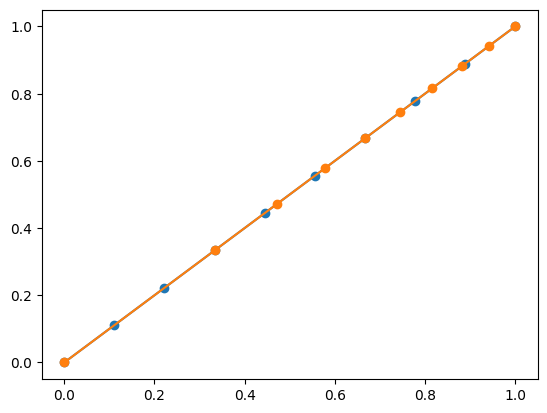

In [197]:
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), marker="o")
plt.plot(quadspace(0, 1, 10), quadspace(0, 1, 10), marker="o")

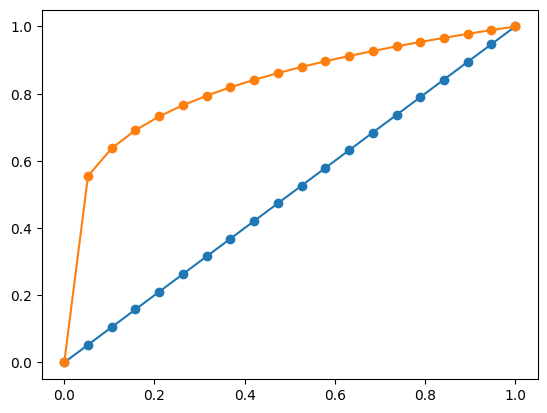

In [201]:
plt.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), marker="o")
plt.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20) ** .2, marker="o")

In [192]:
quadspace(0, 1, 10)

array([0.        , 0.01234568, 0.04938272, 0.11111111, 0.19753086,
       0.30864198, 0.44444444, 0.60493827, 0.79012346, 1.        ])

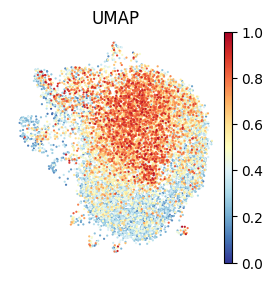

In [169]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="S_score_sigmoid", cmap="RdYlBu_r", vmin=0, vmax=1)
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

In [300]:
hallmark_sets = gp.get_library(name='MSigDB_Hallmark_2020', organism='Human')

In [346]:
import mygene
import numpy as np
import pandas as pd

def gene_query(
    gene_names: list,
    source: list,
    species: str = "human",
    display_hit_rate: bool = True,
    unique: bool = True
) -> dict:
    mg = mygene.MyGeneInfo()
    symbols = mg.querymany(
        gene_names, 
        scopes="symbol,alias", 
        fields="symbol", 
        species="human",
        as_dataframe=True
    )

    source = set(source)
    found_genes = []

    for g in symbols.index:
        if 'symbol' not in symbols.columns:
            continue

        val = symbols.loc[g, 'symbol']

        if pd.isna(val) if isinstance(val, str) else pd.isna(val).all():
            continue

        sym = val.iloc[0] if isinstance(val, pd.Series) else val

        if sym in source:
            found_genes += [sym]

    if display_hit_rate:
        print(f"{len(found_genes)}/{len(gene_names)} were found in the source")
        if unique and np.unique(found_genes).size != len(found_genes):
            print(f"{np.unique(found_genes).size} genes will be returned due to duplication/multiplication")

    return np.unique(found_genes).tolist() if unique else found_genes

In [347]:
gene_query(kras_up_genes, df.var.gene_name.unique())

INFO:biothings.client:querying 1-200 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


64/200 were found in the source
59 genes will be returned due to duplication/multiplication


['ADAM17',
 'AKT2',
 'AMMECR1',
 'ANKH',
 'ATG10',
 'AVL9',
 'BPGM',
 'BTBD3',
 'CAB39L',
 'CBL',
 'CBR4',
 'CBX8',
 'CCND2',
 'CCSER2',
 'CDADC1',
 'CTSS',
 'CXXC1',
 'DCBLD2',
 'DOCK2',
 'ERO1A',
 'ETV4',
 'ETV5',
 'EVI5',
 'FBXO4',
 'FCER1G',
 'FUCA1',
 'GLRX',
 'GYPC',
 'IKZF1',
 'JUP',
 'LAPTM5',
 'MAP3K1',
 'NIN',
 'PLAUR',
 'POLR2D',
 'PPP1R15A',
 'PRELID3B',
 'PTBP2',
 'PTCD2',
 'RABGAP1L',
 'RBM4',
 'RELN',
 'RGS16',
 'SDCCAG8',
 'SLC7A8',
 'SPRY2',
 'ST6GAL1',
 'STRN',
 'TFPI',
 'TMEM158',
 'TOR1AIP2',
 'TOX4',
 'TRIB2',
 'TSPAN13',
 'USP12',
 'WDR33',
 'YRDC',
 'ZNF277',
 'ZNF639']

In [337]:
results

_id     _score  symbol
query                           
ATG10   83734  16.951400   ATG10
CIDEA    1149  17.806957   CIDEA
EREG     2069  17.645033    EREG
MALL     7851  18.393532    MALL
NIN     51199  17.536934     NIN
...       ...        ...     ...
USH1C   10083  17.661180   USH1C
RBM4     5936  20.924044    RBM4
IL1RL2   8808  18.650040  IL1RL2
FBXO4   26272  17.613377   FBXO4
EPHB2    2048  18.251257   EPHB2

[207 rows x 3 columns]

In [301]:
import mygene
import pandas as pd

# 1. 変換ツールの初期化
mg = mygene.MyGeneInfo()

# あなたの持っているKEGGの遺伝子リスト (ここでは例として一部抜粋)
kras_up_genes = hallmark_sets['KRAS Signaling Up']

# 2. クエリを実行 (Aliasも含めて検索し、Symbolを返す)
#    scopes='symbol,alias' で別名も検索対象にします
#    fields='symbol' で正式なシンボルを取得します
results = mg.querymany(
    kras_up_genes, 
    scopes='symbol,alias', 
    fields='symbol', 
    species='human',
    as_dataframe=True
)

# 3. データセットの遺伝子リスト (data.var_names) と照合
#    (dataというAnnDataオブジェクトがあると仮定)
dataset_genes = set(df.var.gene_name.values)

# 結果の確認
mapped_genes = []
still_missing = []

for original_query in results.index:
    # mygeneが返した正式シンボルを取得
    if 'symbol' in results.loc[original_query]:
        official_symbol = results.loc[original_query]['symbol']
        
        # DataFrameの場合、複数ヒットすることがあるので処理
        if isinstance(official_symbol, pd.Series):
            official_symbol = official_symbol.iloc[0] # 最初の候補を採用
            
        if official_symbol in dataset_genes:
            mapped_genes.append(official_symbol)
            # print(f"Found: {original_query} -> {official_symbol}")
        else:
            still_missing.append(original_query)
    else:
        still_missing.append(original_query)

print(f"変換して見つかった遺伝子数: {len(mapped_genes)}")
print(f"それでも無い遺伝子数: {len(still_missing)}")

# 最終的に解析に使うリスト
final_mapk_genes = list(set(mapped_genes))

INFO:biothings.client:querying 1-200 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


変換して見つかった遺伝子数: 64
それでも無い遺伝子数: 143


In [302]:
mapped_genes

['ATG10',
 'NIN',
 'POLR2D',
 'POLR2D',
 'ZNF277',
 'GLRX',
 'TFPI',
 'AKT2',
 'RABGAP1L',
 'ST6GAL1',
 'AMMECR1',
 'CCSER2',
 'STRN',
 'IKZF1',
 'ANKH',
 'FUCA1',
 'JUP',
 'DCBLD2',
 'WDR33',
 'SLC7A8',
 'SLC7A8',
 'SDCCAG8',
 'AVL9',
 'GYPC',
 'CAB39L',
 'TOR1AIP2',
 'CTSS',
 'FCER1G',
 'PRELID3B',
 'LAPTM5',
 'TMEM158',
 'ADAM17',
 'ERO1A',
 'CBR4',
 'MAP3K1',
 'PTCD2',
 'PPP1R15A',
 'RGS16',
 'RELN',
 'CCND2',
 'CXXC1',
 'CXXC1',
 'YRDC',
 'BTBD3',
 'CDADC1',
 'CBX8',
 'ETV4',
 'ETV5',
 'TOX4',
 'TOX4',
 'ZNF639',
 'DOCK2',
 'PTBP2',
 'EVI5',
 'PLAUR',
 'BPGM',
 'SPRY2',
 'TRIB2',
 'USP12',
 'USP12',
 'TSPAN13',
 'CBL',
 'RBM4',
 'FBXO4']

In [304]:
mapk_id = [name2id[g] for g in mapped_genes]

In [305]:
sc.tl.score_genes(
    df, 
    gene_list=mapk_id, 
    score_name='MAPK_score', 
    ctrl_size=50, 
    n_bins=25, 
    use_raw=False
)

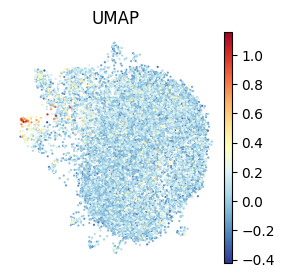

In [306]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="MAPK_score", cmap="RdYlBu_r")
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

In [307]:
df.obs['MAPK_score_sigmoid'] = sigmoid(df.obs['MAPK_score'])

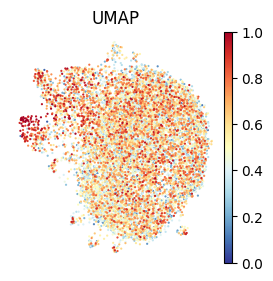

In [308]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="MAPK_score_sigmoid", cmap="RdYlBu_r", vmin=0, vmax=1)
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

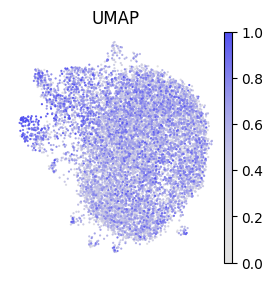

In [309]:
fig, ax = plt.subplots(figsize=(3, 3))

sc.pl.umap(df, ax=ax, size=10, show=False, color="MAPK_score_sigmoid", cmap=seurat, vmin=0, vmax=1)
ax.axis("off");
ax.set(title=f"UMAP", xlabel="UMAP1", ylabel="UMAP2");

In [246]:
df.obs["S_score_sigmoid"].sort_values().index

Index(['GGAAGTGTCGGCATTA-7', 'ACACCAATCCTTCGAC-38', 'ATGTCCCCAACTCCAA-23',
       'TACCGGGTCGTCCTCA-10', 'TCCTCTTTCCTTTAGT-41', 'TGTAGACAGGTTTACC-42',
       'TCACATTTCCTCTTTC-38', 'TTAATCCAGTTGCGCC-22', 'CCTATCGGTAGGCAGT-33',
       'GGTGGCTCAGTCAACT-34',
       ...
       'ACGGAAGAGAGGATCC-25', 'AGGGTTTGTGGGTTGA-29', 'GTTAGACCAACGACAG-6',
       'GAGGGATAGTACTCGT-6', 'GGTGGCTTCTTGCAGA-38', 'TCCGGGACATCATCCC-9',
       'CCTCCTCTCTACCAGA-18', 'CCTCATGGTACCTTCC-10', 'CCGTAGGGTGAGGAAA-27',
       'GTGAGTTCACTCCGGA-43'],
      dtype='object', name='cell_barcode', length=10691)

In [310]:
import seaborn as sns

In [311]:
id2name = {v: k for k, v in name2id.items()}

In [312]:
df[:, mapk_id].to_df()

gene_id              ENSG00000152348  ENSG00000100503  ENSG00000144231  \
cell_barcode                                                             
AAACCCAAGCGAGGAG-47         1.203221        -0.348664         2.494390   
AAACCCAAGCGTCTGC-27        -0.557493        -0.528229        -0.142930   
AAACCCAAGGAGGGTG-47        -0.449842        -0.348664        -0.648415   
AAACCCAAGTACCCTA-20         0.587634        -0.364480         0.410477   
AAACCCAAGTGTTCAC-3          0.731353        -0.504762        -1.049154   
...                              ...              ...              ...   
TTTGTTGGTCGGCCTA-1         -0.534106        -0.467105        -0.909563   
TTTGTTGGTCGTCTCT-6         -0.584584        -0.576891        -0.906548   
TTTGTTGGTGCTATTG-36        -0.637127        -0.539953         0.943306   
TTTGTTGTCGCAACAT-25        -0.479140         0.756770         0.602079   
TTTGTTGTCTCCATAT-23         0.538981        -0.355634         0.547900   

gene_id              ENSG00000144231  ENSG00000198839  ENSG00000173221  \
cell_barcode                                                             
AAACCCAAGCGAGGAG-47         2.494390        -0.318714        -0.316888   
AAACCCAAGCGTCTGC-27        -0.142930         1.337868        -0.326602   
AAACCCAAGGAGGGTG-47        -0.648415        -0.318714        -0.316888   
AAACCCAAGTACCCTA-20         0.410477         0.859819        -0.395420   
AAACCCAAGTGTTCAC-3         -1.049154        -0.550144        -0.368717   
...                              ...              ...              ...   
TTTGTTGGTCGGCCTA-1         -0.909563        -0.492071         3.648385   
TTTGTTGGTCGTCTCT-6         -0.906548        -0.420128        -0.282199   
TTTGTTGGTGCTATTG-36         0.943306        -0.527882        -0.392593   
TTTGTTGTCGCAACAT-25         0.602079        -0.445218        -0.347779   
TTTGTTGTCTCCATAT-23         0.547900        -0.444380        -0.331692   

gene_id              ENSG00000003436  ENSG00000105221  ENSG00000152061  \
cell_barcode                                                             
AAACCCAAGCGAGGAG-47        -0.308740         0.777472        -0.328098   
AAACCCAAGCGTCTGC-27        -0.434026        -0.674608        -0.445487   
AAACCCAAGGAGGGTG-47        -0.308740        -0.480223        -0.328098   
AAACCCAAGTACCCTA-20        -0.419079        -0.611787        -0.426395   
AAACCCAAGTGTTCAC-3         -0.462782         0.583802        -0.535262   
...                              ...              ...              ...   
TTTGTTGGTCGGCCTA-1          1.628232         2.994208        -0.494724   
TTTGTTGGTCGTCTCT-6         -0.478093        -0.660251        -0.487203   
TTTGTTGGTGCTATTG-36        -0.390816        -0.732925        -0.581945   
TTTGTTGTCGCAACAT-25        -0.283278         0.659519        -0.433788   
TTTGTTGTCTCCATAT-23        -0.426027         0.379846         1.371387   

gene_id              ENSG00000073849  ...  ENSG00000011422  ENSG00000172331  \
cell_barcode                          ...                                     
AAACCCAAGCGAGGAG-47        -0.410482  ...        -0.277624         0.994098   
AAACCCAAGCGTCTGC-27        -0.407508  ...        -0.370249        -0.447598   
AAACCCAAGGAGGGTG-47        -0.410482  ...        -0.277624        -0.392636   
AAACCCAAGTACCCTA-20         2.617805  ...        -0.369167        -0.482542   
AAACCCAAGTGTTCAC-3         -0.466105  ...        -0.332836        -0.422393   
...                              ...  ...              ...              ...   
TTTGTTGGTCGGCCTA-1         -0.362541  ...        -0.335724        -0.457437   
TTTGTTGGTCGTCTCT-6         -0.469079  ...        -0.230490        -0.486446   
TTTGTTGGTGCTATTG-36        -0.420185  ...        -0.376073        -0.382937   
TTTGTTGTCGCAACAT-25        -0.387994  ...         2.857615        -0.473512   
TTTGTTGTCTCCATAT-23        -0.460853  ...        -0.420966        -0.515120   

gene_id              ENSG00000136158  ENSG00000071575  ENSG00000152484  \
cell_barc

In [313]:
pd.DataFrame(
    df[:, mapk_id].to_df().values,
    index=df.obs_names, columns=[id2name[g] for g in mapk_id]
)

ATG10       NIN    POLR2D    POLR2D    ZNF277  \
cell_barcode                                                            
AAACCCAAGCGAGGAG-47  1.203221 -0.348664  2.494390  2.494390 -0.318714   
AAACCCAAGCGTCTGC-27 -0.557493 -0.528229 -0.142930 -0.142930  1.337868   
AAACCCAAGGAGGGTG-47 -0.449842 -0.348664 -0.648415 -0.648415 -0.318714   
AAACCCAAGTACCCTA-20  0.587634 -0.364480  0.410477  0.410477  0.859819   
AAACCCAAGTGTTCAC-3   0.731353 -0.504762 -1.049154 -1.049154 -0.550144   
...                       ...       ...       ...       ...       ...   
TTTGTTGGTCGGCCTA-1  -0.534106 -0.467105 -0.909563 -0.909563 -0.492071   
TTTGTTGGTCGTCTCT-6  -0.584584 -0.576891 -0.906548 -0.906548 -0.420128   
TTTGTTGGTGCTATTG-36 -0.637127 -0.539953  0.943306  0.943306 -0.527882   
TTTGTTGTCGCAACAT-25 -0.479140  0.756770  0.602079  0.602079 -0.445218   
TTTGTTGTCTCCATAT-23  0.538981 -0.355634  0.547900  0.547900 -0.444380   

                         GLRX      TFPI      AKT2  RABGAP1L   ST6GAL1  ...  \
cell_barcode                                                           ...   
AAACCCAAGCGAGGAG-47 -0.316888 -0.308740  0.777472 -0.328098 -0.410482  ...   
AAACCCAAGCGTCTGC-27 -0.326602 -0.434026 -0.674608 -0.445487 -0.407508  ...   
AAACCCAAGGAGGGTG-47 -0.316888 -0.308740 -0.480223 -0.328098 -0.410482  ...   
AAACCCAAGTACCCTA-20 -0.395420 -0.419079 -0.611787 -0.426395  2.617805  ...   
AAACCCAAGTGTTCAC-3  -0.368717 -0.462782  0.583802 -0.535262 -0.466105  ...   
...                       ...       ...       ...       ...       ...  ...   
TTTGTTGGTCGGCCTA-1   3.648385  1.628232  2.994208 -0.494724 -0.362541  ...   
TTTGTTGGTCGTCTCT-6  -0.282199 -0.478093 -0.660251 -0.487203 -0.469079  ...   
TTTGTTGGTGCTATTG-36 -0.392593 -0.390816 -0.732925 -0.581945 -0.420185  ...   
TTTGTTGTCGCAACAT-25 -0.347779 -0.283278  0.659519 -0.433788 -0.387994  ...   
TTTGTTGTCTCCATAT-23 -0.331692 -0.426027  0.379846  1.371387 -0.460853  ...   

                        PLAUR      BPGM     SPRY2     TRIB2     USP12  \
cell_barcode                                                            
AAACCCAAGCGAGGAG-47 -0.277624  0.994098 -0.320093 -0.622538 -0.386530   
AAACCCAAGCGTCTGC-27 -0.370249 -0.447598 -0.357813 -0.669062 -0.557275   
AAACCCAAGGAGGGTG-47 -0.277624 -0.392636 -0.320093 -0.622538 -0.386530   
AAACCCAAGTACCCTA-20 -0.369167 -0.482542 -0.268195  0.053475 -0.448473   
AAACCCAAGTGTTCAC-3  -0.332836 -0.422393 -0.377286  0.851106 -0.636257   
...                       ...       ...       ...       ...       ...   
TTTGTTGGTCGGCCTA-1  -0.335724 -0.457437  0.713509  0.737626 -0.473771   
TTTGTTGGTCGTCTCT-6  -0.230490 -0.486446 -0.333314  0.525156 -0.534015   
TTTGTTGGTGCTATTG-36 -0.376073 -0.382937 -0.408361 -0.841764  4.927049   
TTTGTTGTCGCAACAT-25  2.857615 -0.473512 -0.412298 -0.074733  0.390493   
TTTGTTGTCTCCATAT-23 -0.420966 -0.515120 -0.445173 -0.867851  0.862967   

                        USP12   TSPAN13       CBL      RBM4     FBXO4  
cell_barcode                                                           
AAACCCAAGCGAGGAG-47 -0.386530 -0.533553  0.818425 -0.441243  1.681988  
AAACCCAAGCGTCTGC-27 -0.557275 -0.605680 -0.639363 -0.543423 -0.373778  
AAACCCAAGGAGGGTG-47 -0.386530 -0.533553  0.926435  0.916172 -0.308564  
AAACCCAAGTACCCTA-20 -0.448473  0.186732  0.579394  1.115500 -0.503550  
AAACCCAAGTGTTCAC-3  -0.636257 -0.665947  0.565370 -0.756856 -0.360398  
...                       ...       ...       ...       ...       ...  
TTTGTTGGTCGGCCTA-1  -0.473771  0.275036  0.469319  1.658362 -0.323481  
TTTGTTGGTCGTCTCT-6  -0.534015 -0.683554 -0.718357 -0.172582 -0.389867  
TTTGTTGGTGCTATTG-36  4.927049 -0.602850 -0.612805 -1.293091 -0.436495  
TTTGTTGTCGCAACAT-25  0.390493 -0.545931 -0.621334 -0.022283 -0.328964  
TTTGTTGTCTCCATAT-23  0.862967 -0.744924 -0.510910 -1.378725 -0.418266  

[10691 rows x 64 columns]

In [314]:
df_mapk

GRB2     PLCG2      SOS1       SOS2     PRKCA  \
cell_barcode                                                             
GGAAGTGTCGGCATTA-7  -1.258642  4.674922 -0.685574  12.682304 -0.414901   
ACACCAATCCTTCGAC-38  3.917706 -0.086385  2.685210  -0.442809 -0.479913   
ATGTCCCCAACTCCAA-23  1.371423 -0.404402 -0.533836  -0.359568 -0.454201   
TACCGGGTCGTCCTCA-10  1.099718 -0.489340  1.955285  -0.459551 -0.411692   
TCCTCTTTCCTTTAGT-41  0.192415 -0.585851  0.762718  -0.409638 -0.453911   
...                       ...       ...       ...        ...       ...   
TCCGGGACATCATCCC-9   0.822368 -0.512979 -0.653966  -0.416711 -0.499879   
CCTCCTCTCTACCAGA-18  0.420116 -0.433876 -0.530526  -0.379640 -0.403758   
CCTCATGGTACCTTCC-10  0.371465 -0.489340  1.158695  -0.459551 -0.411692   
CCGTAGGGTGAGGAAA-27 -0.437104 -0.572038 -0.583867  -0.455156  1.929523   
GTGAGTTCACTCCGGA-43 -1.038440 -0.524980 -0.499839  -0.342483  2.974477   

                        PRKCB      KRAS      NRAS      HRAS      RAF1  \
cell_barcode                                                            
GGAAGTGTCGGCATTA-7  -0.642698 -0.989683 -0.620034 -0.709015  5.829914   
ACACCAATCCTTCGAC-38 -0.659422  2.681529 -0.745660 -0.837655 -0.903053   
ATGTCCCCAACTCCAA-23  1.901491 -1.029996 -0.715668 -0.846052  3.603822   
TACCGGGTCGTCCTCA-10  1.782401  0.821958 -0.697800  1.067734 -0.811221   
TCCTCTTTCCTTTAGT-41  0.521848  0.547849 -0.711049  0.205245 -0.740535   
...                       ...       ...       ...       ...       ...   
TCCGGGACATCATCCC-9   1.557346 -0.217092  0.417307  0.512985  1.268138   
CCTCCTCTCTACCAGA-18 -0.646579 -0.149751 -0.740990  0.364744  3.866720   
CCTCATGGTACCTTCC-10 -0.674470 -1.034594 -0.697800 -0.867682  0.520774   
CCGTAGGGTGAGGAAA-27  0.660842  0.181715 -0.741441 -0.701045 -0.732534   
GTGAGTTCACTCCGGA-43  1.853311 -0.964184 -0.647413 -0.771675  1.532016   

                         BRAF      ARAF    MAP2K1    MAP2K2     MAPK1  \
cell_barcode                                                            
GGAAGTGTCGGCATTA-7  -0.749344  6.513987 -0.710281 -1.492203  1.489761   
ACACCAATCCTTCGAC-38  9.486902 -0.522557  2.390691  0.892939  0.966991   
ATGTCCCCAACTCCAA-23  2.050776 -0.502140 -0.641438 -0.071468  1.564420   
TACCGGGTCGTCCTCA-10 -0.640885 -0.450071  2.128210  0.266941  2.422437   
TCCTCTTTCCTTTAGT-41  0.492412 -0.484790  0.533667  0.166885  0.382226   
...                       ...       ...       ...       ...       ...   
TCCGGGACATCATCCC-9   0.708269 -0.470248 -0.736118  0.813250 -0.203893   
CCTCCTCTCTACCAGA-18  0.985525 -0.521035  2.361896 -1.207274 -1.780659   
CCTCATGGTACCTTCC-10  1.117418 -0.450071  1.266237 -0.309512  2.281021   
CCGTAGGGTGAGGAAA-27 -0.656462 -0.462526 -0.609086 -0.810026  0.561812   
GTGAGTTCACTCCGGA-43 -0.632778  3.800135  2.733047  0.536411  0.328631   

                        MAPK3   S_score  
cell_barcode                             
GGAAGTGTCGGCATTA-7  -0.382871 -1.829249  
ACACCAATCCTTCGAC-38  3.784876 -1.782161  
ATGTCCCCAACTCCAA-23  2.781936 -1.523073  
TACCGGGTCGTCCTCA-10 -0.466704 -1.469363  
TCCTCTTTCCTTTAGT-41 -0.426362 -1.441305  
...                       ...       ...  
TCCGGGACATCATCCC-9  -0.479026  1.854409  
CCTCCTCTCTACCAGA-18 -0.504996  1.891634  
CCTCATGGTACCTTCC-10 -0.466704  1.905518  
CCGTAGGGTGAGGAAA-27 -0.434297  2.074080  
GTGAGTTCACTCCGGA-43 -0.471556  2.272723  

[10691 rows x 17 columns]

In [325]:
df_mapk = pd.DataFrame(
    df[:, mapk_id].to_df().values,
    index=df.obs_names, columns=[id2name[g] for g in mapk_id]
)

In [327]:
df_mapk.assign(
    MAPK_score=df.obs["MAPK_score"]
).corr("kendall").abs().MAPK_score.sort_values(ascending=False)[:11]

MAPK_score    1.000000
LAPTM5        0.103805
WDR33         0.091233
PPP1R15A      0.090377
EVI5          0.088617
TOR1AIP2      0.085179
TOX4          0.084617
TOX4          0.084617
CBL           0.083293
RBM4          0.082747
STRN          0.081911
Name: MAPK_score, dtype: float64

In [324]:
df_mapk.corr("kendall").abs().S_score.sort_values(ascending=False)[:11]

S_score     1.000000
TSPAN13     0.050535
CTSS        0.049574
TRIB2       0.047311
TOR1AIP2    0.046703
GYPC        0.041106
PPP1R15A    0.031222
TFPI        0.030476
AMMECR1     0.029540
NIN         0.028273
EVI5        0.025625
Name: S_score, dtype: float64

In [ ]:
sns.heatmap(
    pd.DataFrame(
        zscore(df_mapk, axis=0),
        index=df_mapk.index, columns=[id2name[g] for g in mapk_id] + ["S score"]
    ),
    cmap="RdYlBu_r", yticklabels=False, center=0
)

<Axes: >

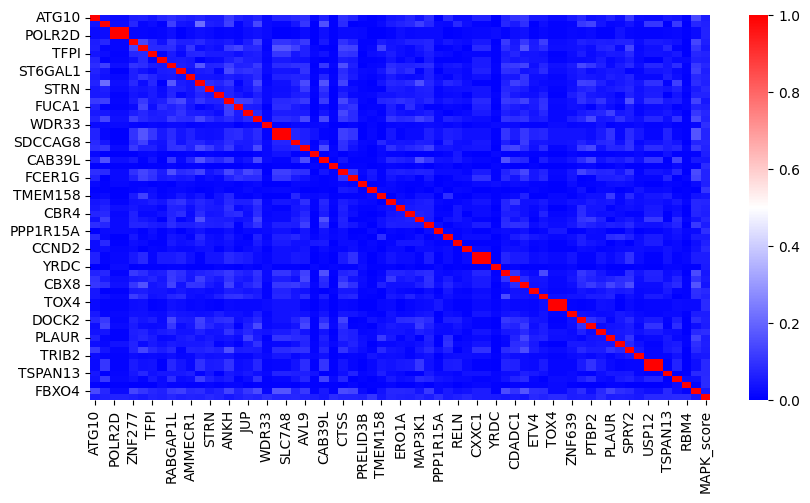

In [334]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    df_mapk.assign(
        MAPK_score=df.obs["MAPK_score"]
    ).corr("kendall").abs(),
    vmax=1, vmin=0, cmap="bwr"
)